In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]


In [58]:
casc_path = '/Users/mac/opencv-python-4.5.3.56/opencv/data/haarcascades/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(casc_path)


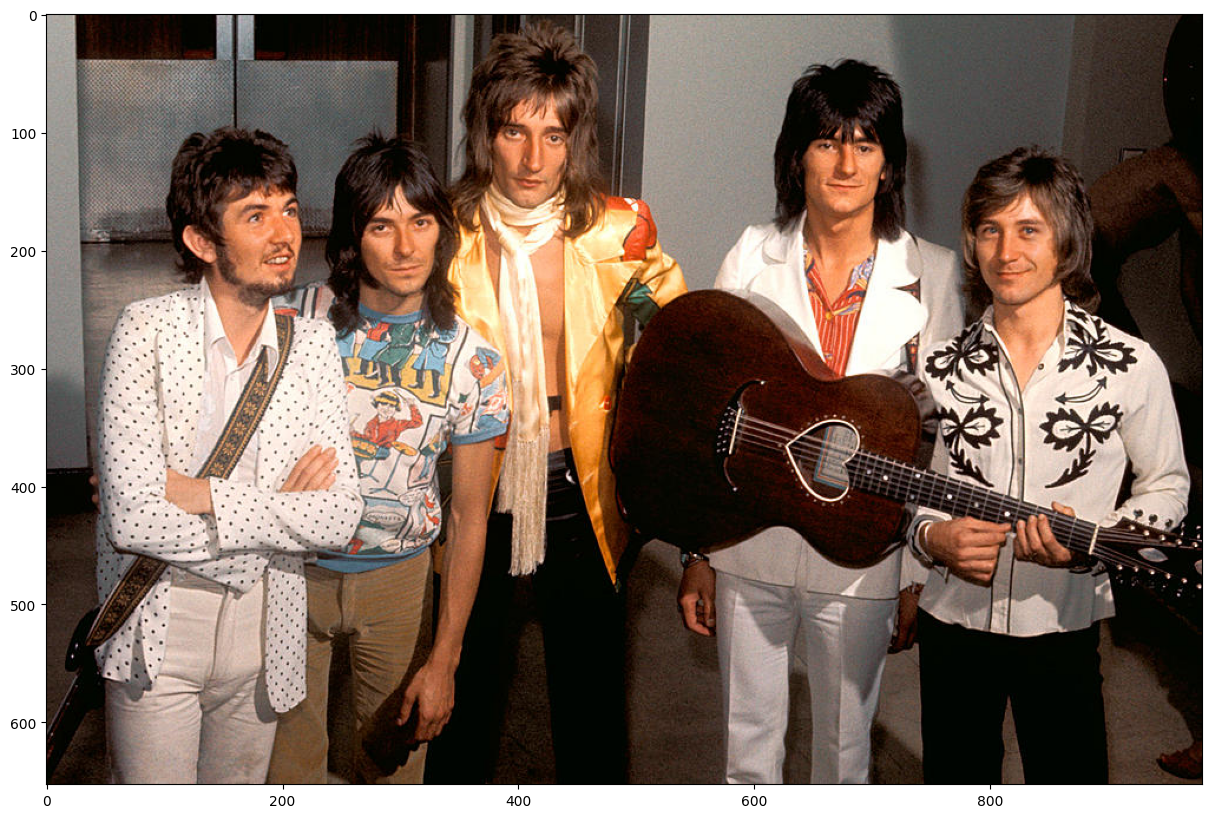

In [59]:
img = cv2.imread('555.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

Number of detected faces: 5


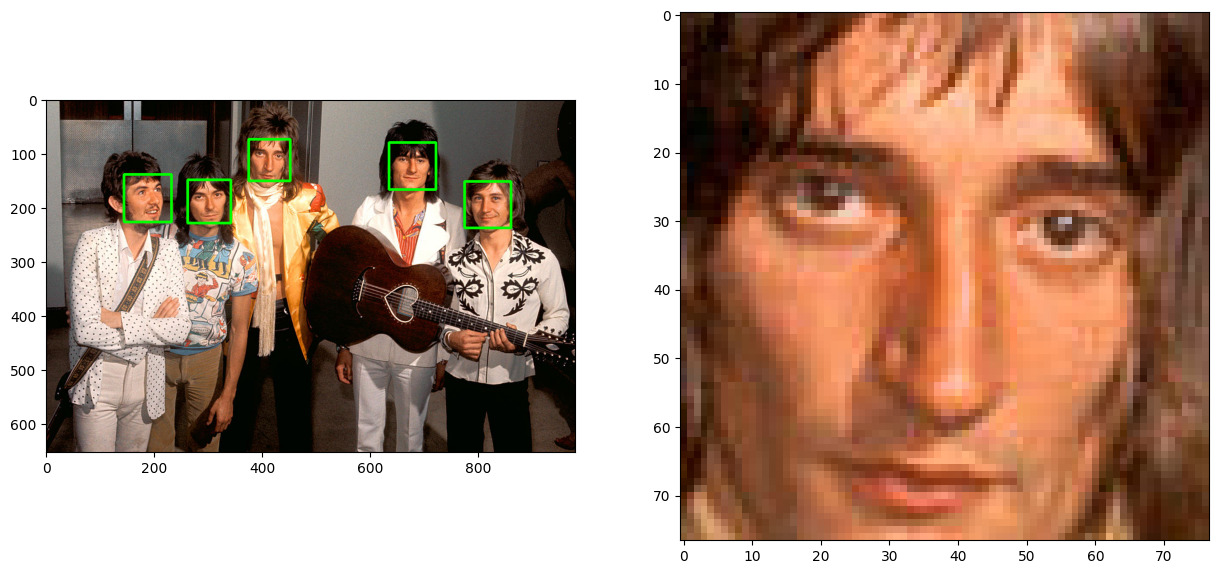

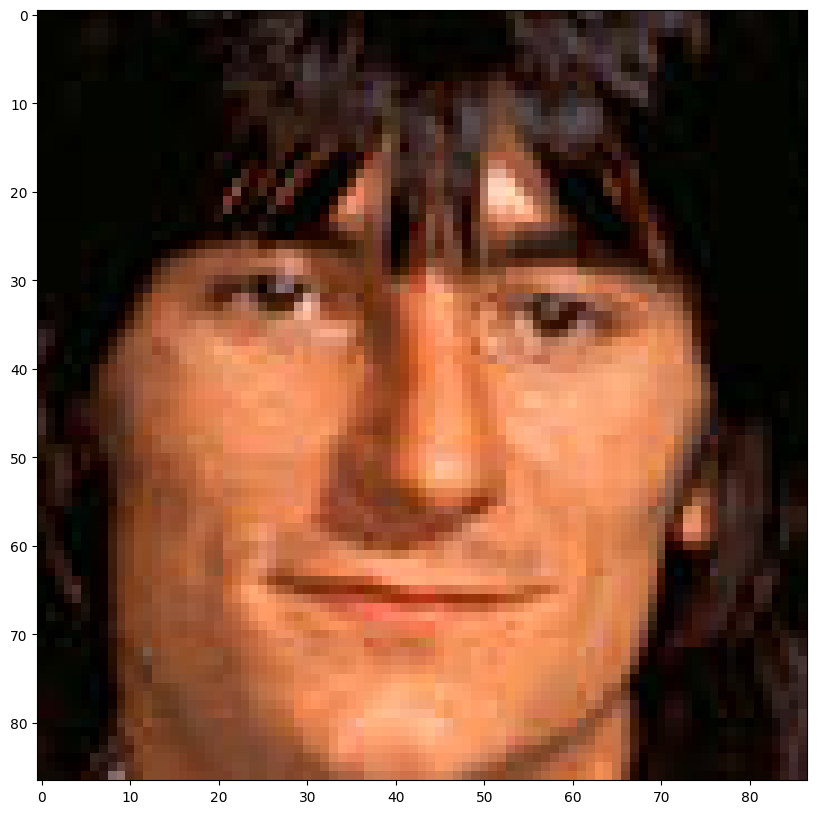

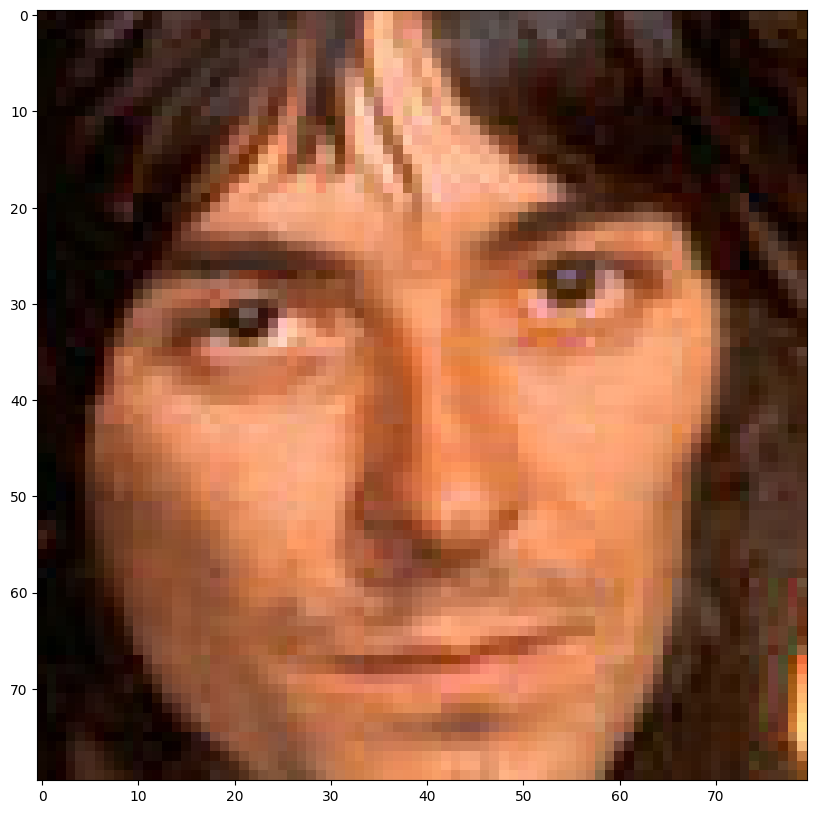

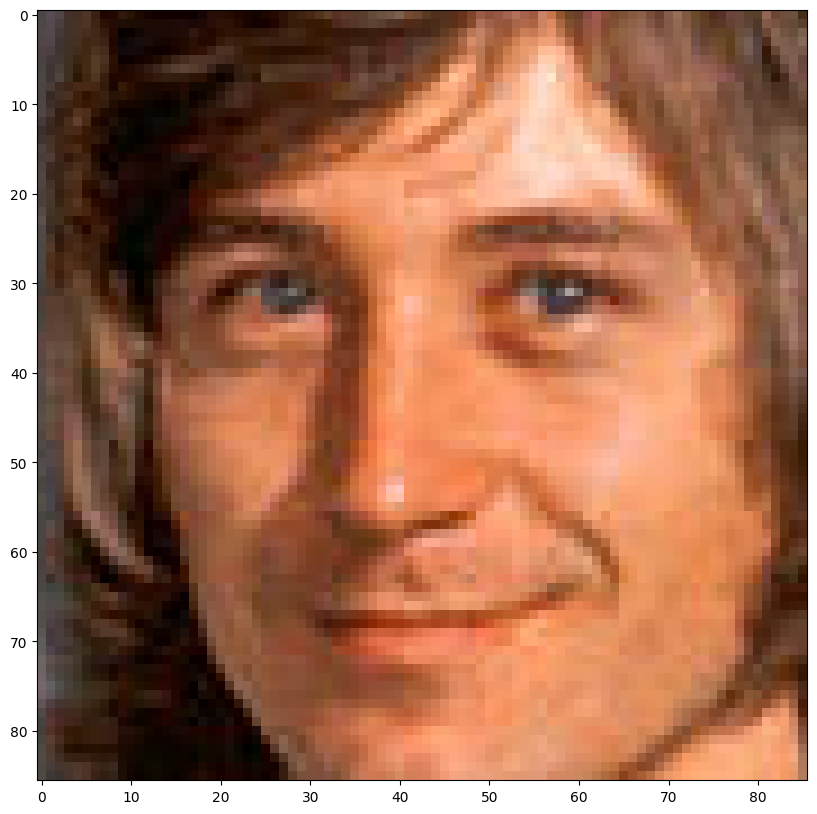

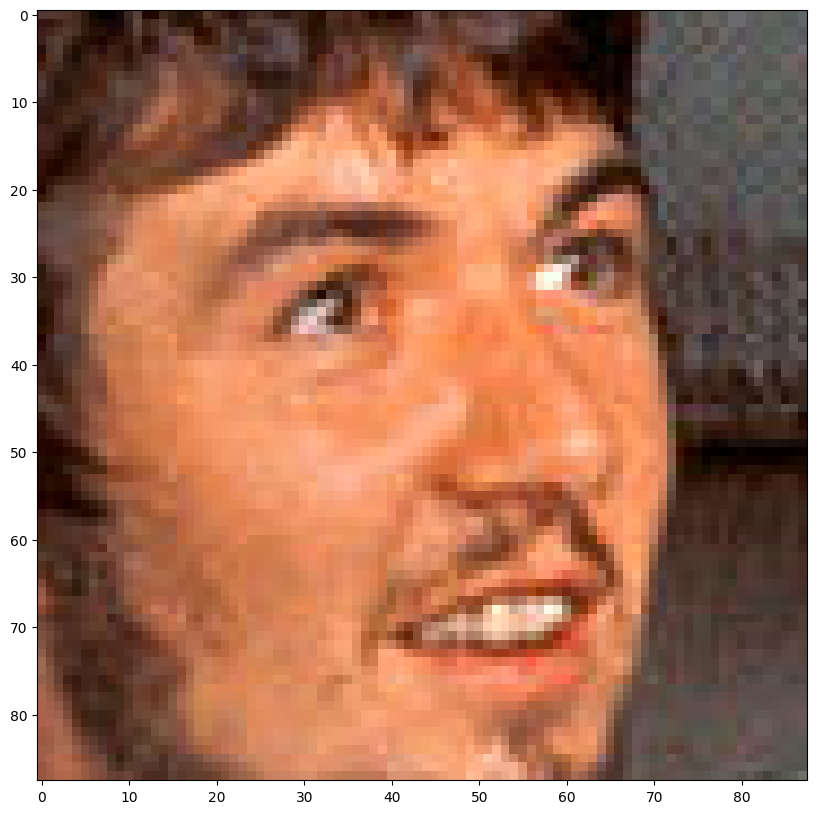

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Perform face detection
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, flags=cv2.CASCADE_SCALE_IMAGE)

# Print the number of detected faces
print('Number of detected faces:', len(faces))

# Draw rectangles around each detected face on the original image
result = np.copy(img)
for (x, y, w, h) in faces:
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Display the original image with bounding boxes around detected faces
plt.subplot(121), plt.imshow(result, cmap='gray')

# Display each detected face separately
plt.subplot(122)
for (x, y, w, h) in faces:
    face_img = img[y:y+h, x:x+w, :]
    plt.imshow(face_img)
    plt.show()



(<Axes: >, <matplotlib.image.AxesImage at 0x7a6d38711990>)

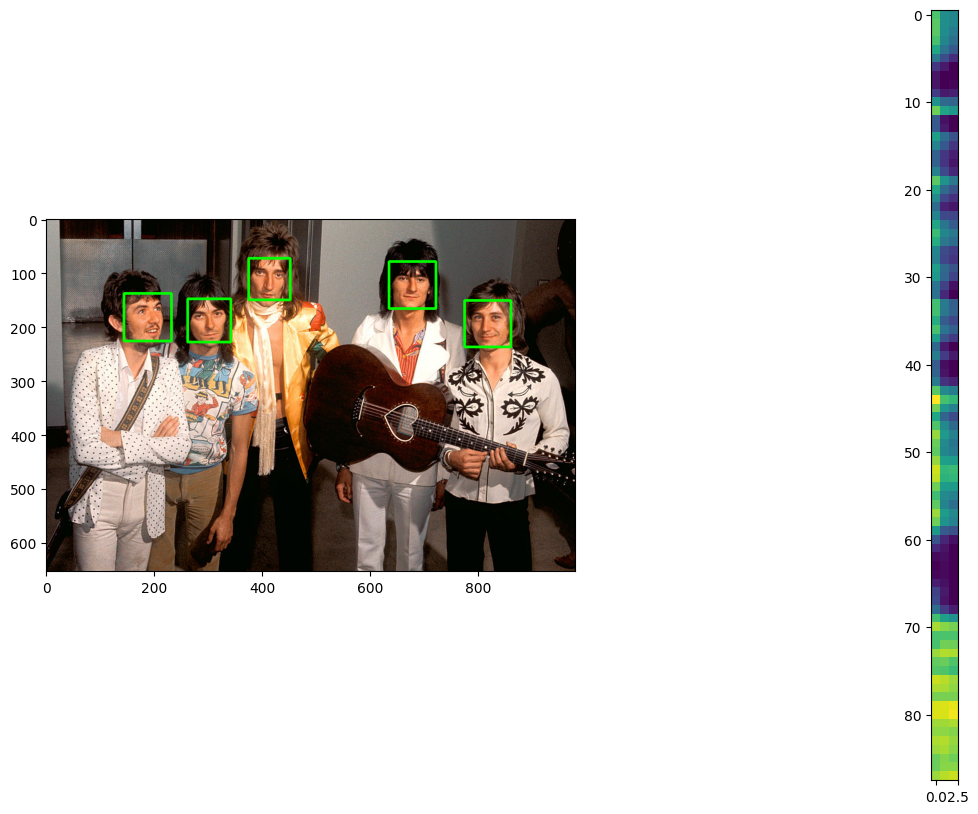

In [61]:
plt.subplot(121), plt.imshow(result, cmap='gray')
plt.subplot(122), plt.imshow(face_img[0])

Number of detected faces: 5
rectangles[[(776, 163) (851, 237)], [(262, 163) (337, 237)], [(646, 101) (709, 163)], [(145, 136) (235, 226)], [(378, 88) (453, 163)]]
<bound method PyCapsule.left of rectangle(776,163,851,237)>
776 163 75 74
262 163 75 74
646 101 63 62
145 136 90 90
378 88 75 75


(<Axes: title={'center': 'dlib'}>,
 Text(0.5, 1.0, 'dlib'))

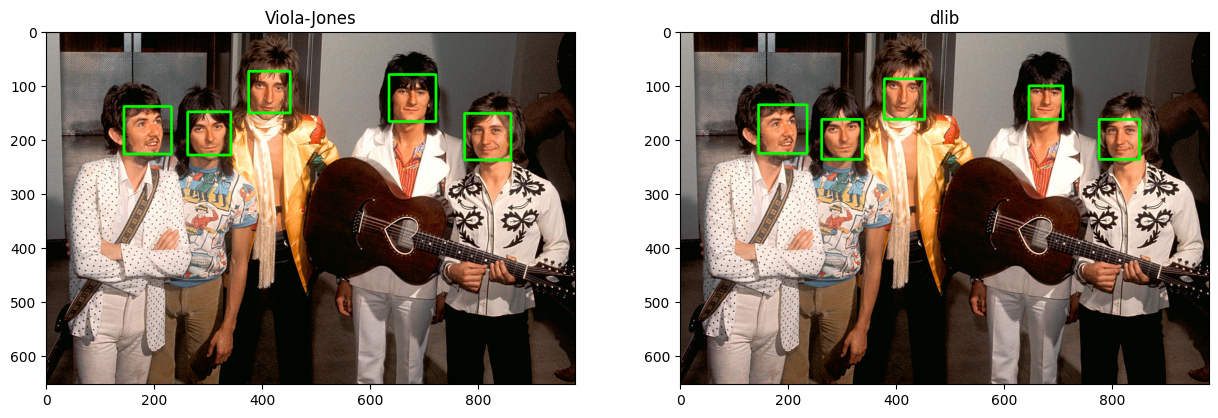

In [62]:
# Face Detection via dlib
import dlib
# Let's load the detector
detector = dlib.get_frontal_face_detector()
# Detect faces, see http://dlib.net/face_detector.py.html
# 1 --> upsampling factor
rects = detector(gray, 1)

print('Number of detected faces:', len(rects))
print(rects)
print(rects[0].left)

def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


# Draw rectangle around each face
result_dlib = np.copy(img)
faces_dlib_img = []
for rect in rects:
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    print(x, y, w, h)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])


plt.subplot(121), plt.imshow(result), plt.title('Viola-Jones')
plt.subplot(122), plt.imshow(result_dlib), plt.title('dlib')

In [63]:
# Load the predictor (you need to download the predictor from an available source)
predictor = dlib.shape_predictor('shape_predictor_81_face_landmarks.dat')

# Check if faces_dlib_img is not empty before accessing its elements
if len(faces_dlib_img) > 0:
    face = faces_dlib_img[0]  # Access the first face
    rows, cols, _ = face.shape
    rect = dlib.rectangle(0, 0, cols, rows)
    shape = predictor(cv2.cvtColor(face, cv2.COLOR_RGB2GRAY), rect)
else:
    print("No faces detected in the image.")





In [64]:
def plot_landmarks(vec):
    plt.plot(vec[0:17,0], vec[0:17,1], 'g.-')       # Contour
    plt.plot(vec[48:68,0], vec[48:68,1], 'g.-')     # Mouth
    plt.plot(vec[17:22,0], vec[17:22,1], 'g.-')     # Right eyebrow
    plt.plot(vec[22:27,0], vec[22:27,1], 'g.-')     # Left eyebrow
    plt.plot(np.concatenate((vec[36:42,0], vec[36:37,0])), np.concatenate((vec[36:42,1], vec[36:37,1])), 'g.-')     # Left eye
    plt.plot(np.concatenate((vec[42:48,0], vec[42:43,0])), np.concatenate((vec[42:48,1], vec[42:43,1])), 'g.-')     # Right eye
    plt.plot(vec[27:36,0], vec[27:36,1], 'g.-')     # Nose

In [65]:
# Convert landmarks to ndarray for better manipulation
kps = list(map(lambda p: (p.x, p.y), shape.parts()))
landmarks = np.array(kps)
print(kps)

[(12, 24), (11, 32), (12, 41), (14, 49), (16, 57), (20, 65), (25, 72), (32, 77), (41, 78), (51, 78), (60, 74), (68, 68), (74, 61), (77, 52), (78, 42), (79, 32), (79, 22), (12, 17), (16, 12), (21, 11), (27, 12), (33, 14), (45, 14), (51, 11), (59, 10), (66, 12), (71, 16), (38, 21), (38, 28), (37, 35), (37, 43), (31, 45), (34, 47), (38, 48), (42, 47), (46, 45), (19, 22), (22, 19), (27, 19), (31, 23), (27, 23), (22, 23), (50, 22), (54, 19), (59, 19), (63, 21), (60, 23), (55, 23), (26, 55), (31, 55), (35, 54), (39, 55), (43, 54), (49, 55), (57, 55), (50, 60), (44, 62), (39, 62), (35, 62), (31, 60), (28, 56), (35, 57), (39, 57), (43, 57), (54, 55), (44, 57), (39, 58), (35, 57), (16, -11), (22, -11), (30, -9), (42, -9), (60, -12), (69, -10), (78, 4), (11, 1), (14, -7), (10, 15), (80, 14), (72, -5), (55, -9)]


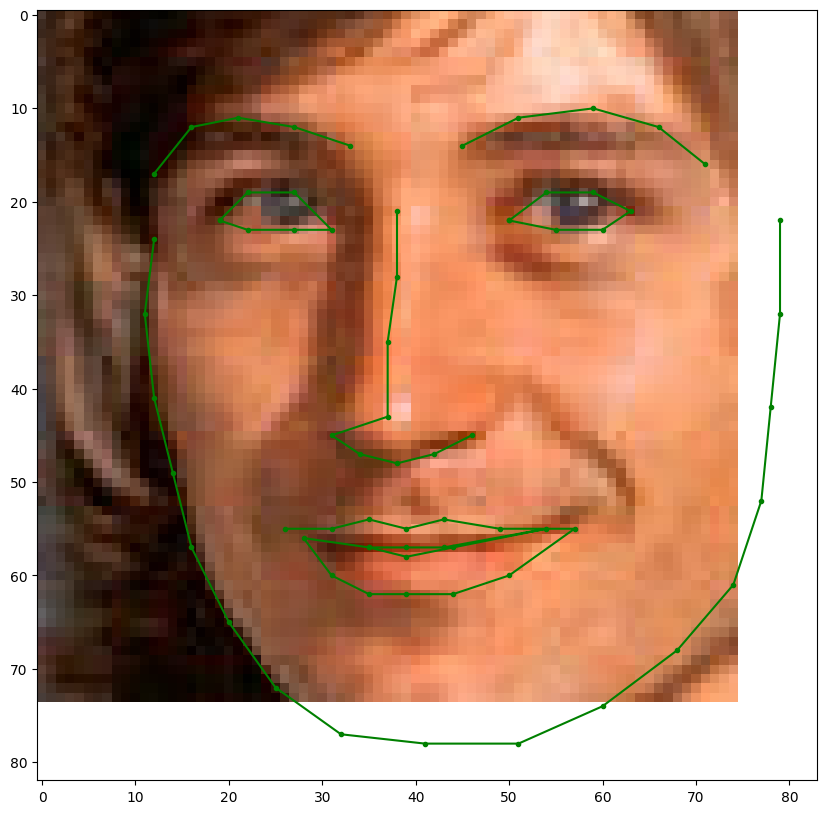

In [66]:
plt.imshow(face)
plot_landmarks(landmarks)

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Load the face template data
face_template = np.load('face_data.npy')

# Check if the loaded data is not empty and has the expected shape
if face_template.shape[0] > 0 and face_template.shape[1] == 2:
    # Normalize the face template data
    tpl_min, tpl_max = np.min(face_template, axis=0), np.max(face_template, axis=0)
    face_template = (face_template - tpl_min) / (tpl_max - tpl_min)

    # Plot the face template
    plt.plot(face_template[:, 0], -face_template[:, 1], 'o')

    # Plot the inner triangle
    inner_triangle = [39, 42, 57]
    plt.plot(face_template[inner_triangle, 0], -face_template[inner_triangle, 1], 'rs')

    # Set aspect ratio to be equal
    plt.axis('square')

    # Show the plot
    plt.show()
else:
    print("No face template data loaded or incorrect shape.")


No face template data loaded or incorrect shape.


In [56]:
out_size = 256
margin = 10
out = np.copy(face)

# Prepare landmarks
landmarks = np.float32(landmarks)
landmarks_idx = np.array(inner_triangle)

# Adjust template (adjust to size, to margin and normalize back)
template = face_template * out_size
template = template + (margin/2)
template = template / (out_size + margin)

# Add a column of ones to make it 3x2
landmarks_src = np.hstack((landmarks[landmarks_idx], np.ones((3, 1), dtype=np.float32)))
template_dst = np.hstack((template[landmarks_idx], np.ones((3, 1), dtype=np.float32)))

# Estimate affine transform
H = cv2.getAffineTransform(landmarks_src, template_dst)

# Rectify final image
aligned = cv2.warpAffine(out, H, (out_size + margin, out_size + margin))

plt.subplot(121), plt.imshow(face), plt.title('Detected')
plt.subplot(122), plt.imshow(aligned), plt.title('Aligned')
plt.show()



UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U7'), dtype('int64')) -> None